<a href="https://colab.research.google.com/github/TrixieAnnGalang/Car-price-prediton/blob/main/to_do_project_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
!unzip car_price_prediction.csv.zip

Archive:  car_price_prediction.csv.zip
  inflating: car_price_prediction.csv  


In [3]:
df = pd.read_csv('car_price_prediction.csv.zip')

## Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

object     13
int64       4
float64     1
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


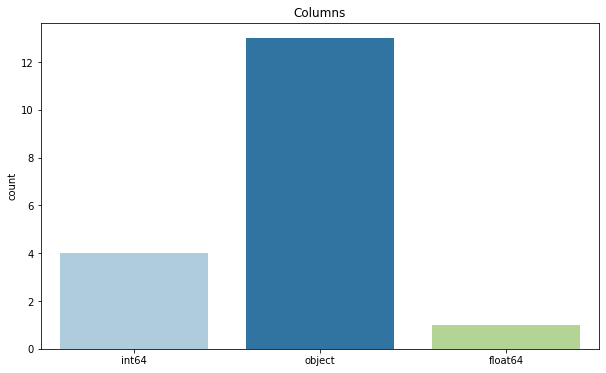

In [5]:
#let us now look how the variables are distributed
plt.figure( figsize=(10,6))
sns.countplot(df.dtypes, palette = 'Paired')
plt.title('Columns', fontsize =12)
print(df.dtypes.value_counts())

In [6]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [8]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [9]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [10]:
df = df.drop('ID', axis =1 )

In [11]:
df.rename(columns = {'Drive wheels':'Drive_Wheels','Gear box type':'gear_box', 'Fuel type':'FuelType','Prod. year':'Year','Leather interior': 'Interior','Engine volume': 'Volume' }, inplace = True)

In [12]:
from pandas.core.arrays import categorical
# to see if columns are type object
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Interior',
 'FuelType',
 'Volume',
 'Mileage',
 'gear_box',
 'Drive_Wheels',
 'Doors',
 'Wheel',
 'Color']

In [13]:
#to see if they have integer values
int_columns = df.select_dtypes(exclude=['object']).columns.to_list()
int_columns

['Price', 'Year', 'Cylinders', 'Airbags']

In [14]:
df.shape

(19237, 17)

## Data cleaning

In [15]:
df.duplicated().sum()

3512

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape #after dropping the dropping the duplicates, we can see the changes in the number of our rows

(15725, 17)

In [19]:
for i in df:
    print(i, df[i].nunique())

Price 2315
Levy 559
Manufacturer 65
Model 1590
Year 54
Category 11
Interior 2
FuelType 7
Volume 107
Mileage 7687
Cylinders 13
gear_box 4
Drive_Wheels 3
Doors 3
Wheel 2
Color 16
Airbags 17


In [20]:
df['Levy']

0        1399
1        1018
2           -
3         862
4         446
         ... 
19230     645
19232       -
19233     831
19234     836
19236     753
Name: Levy, Length: 15725, dtype: object

In [21]:
#removing all the hypens that were given to null values
df['Levy'] =df['Levy'].replace(['-'], 0)
df['Levy']=df['Levy'].astype(str).astype(int)
df['Levy']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        1399
1        1018
2           0
3         862
4         446
         ... 
19230     645
19232       0
19233     831
19234     836
19236     753
Name: Levy, Length: 15725, dtype: int64

In [22]:
#Mileage is considered as an object because it contains km in it 
df['Mileage']=df['Mileage'].apply(lambda x:str(x).replace("km"," "))
df['Mileage']=df['Mileage'].astype(str).astype(int)
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19230    307325
19232    300000
19233    161600
19234    116365
19236    186923
Name: Mileage, Length: 15725, dtype: int64

In [23]:
df['Volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [24]:

df['Volume']=df['Volume'].apply(lambda x:str(x).replace("Turbo"," "))
df['Volume']=df['Volume'].astype(str).astype(float)
df['Volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19230    1.8
19232    2.0
19233    2.4
19234    2.0
19236    2.4
Name: Volume, Length: 15725, dtype: float64

In [25]:
df['Interior']

0        Yes
1         No
2         No
3        Yes
4        Yes
        ... 
19230    Yes
19232    Yes
19233    Yes
19234    Yes
19236    Yes
Name: Interior, Length: 15725, dtype: object

## PLOTS

PLOTTING OUR COLUMNS 

CATEGORICAL VALUES

In [26]:
Manufacturer = df.Manufacturer.value_counts()
Manufacturer

HYUNDAI          3050
TOYOTA           2863
MERCEDES-BENZ    1451
CHEVROLET         968
FORD              956
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


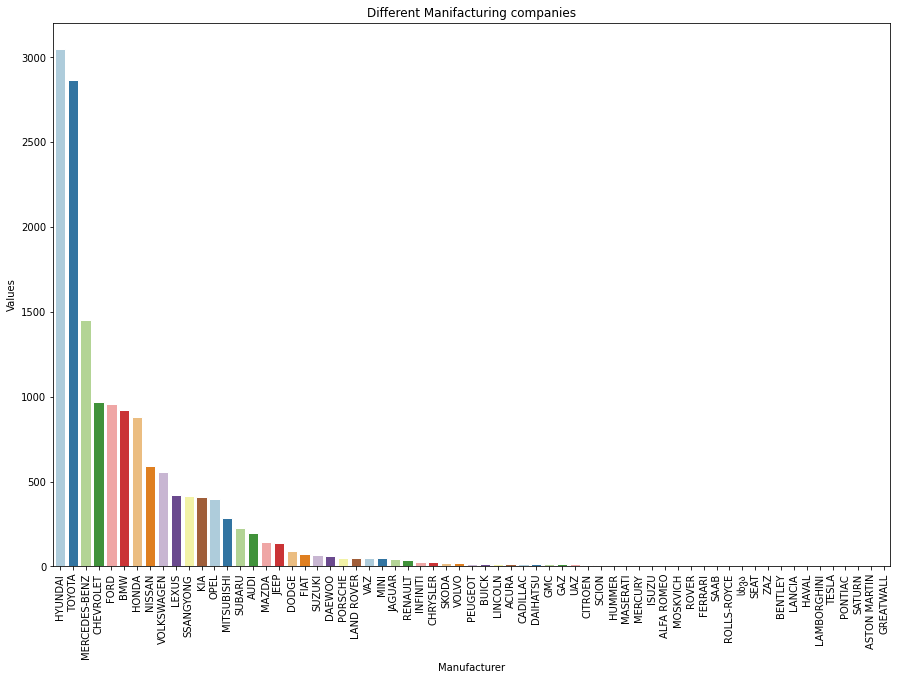

In [27]:
plt.figure(figsize=(15,10))
plt.title('Different Manifacturing companies')
sns.set_style('dark')
m = sns.barplot(Manufacturer.index, Manufacturer, palette ='Paired')
m.set_xticklabels(Manufacturer.index, rotation = 90)
m.set(xlabel ='Manufacturer', ylabel = 'Values')
plt.show()

Car models

In [28]:
Model = df.Model.value_counts().head(40)
Model

Prius         946
Sonata        821
Elantra       720
Camry         581
Santa FE      486
FIT           422
Tucson        406
Aqua          317
Cruze         292
H1            284
X5            244
Optima        226
Fusion        220
Transit       207
Actyon        188
Jetta         186
Civic         167
RAV 4         159
REXTON        151
E 350         150
Astra         149
Captiva       135
Prius C       117
Passat        111
ML 350        106
Forester      101
Orlando       100
Juke           97
Lacetti        95
Escape         92
Malibu         87
Genesis        81
Volt           78
Highlander     77
CT 200h        76
328            75
Focus          75
Insight        74
Tiida          72
Korando        71
Name: Model, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


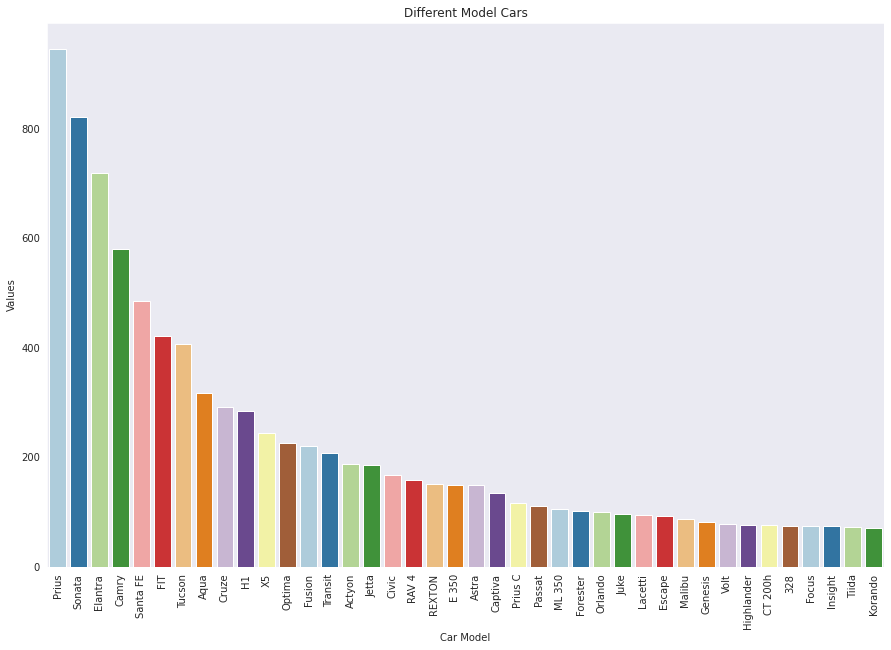

In [29]:
plt.figure(figsize=(15,10))
plt.title('Different Model Cars', fontsize =12)
mode = sns.barplot(Model.index, Model, palette ='Paired')
sns.set_style('dark')
mode.set_xticklabels(Model.index, rotation = 90)
mode.set(xlabel= 'Car Model', ylabel = 'Values')
plt.show()

CARS CATEGORY


In [30]:
Category = df.Category.value_counts()
Category

Sedan          7010
Jeep           4225
Hatchback      2548
Minivan         534
Coupe           476
Universal       311
Microbus        295
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


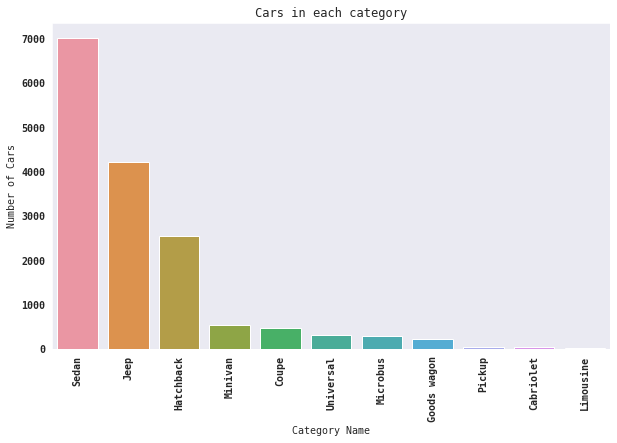

In [31]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=2)
font = {'family' : 'monospace',
        'weight' : 'bold',
        }
plt.rc('font', **font)
plt.title( 'Cars in each category')
sns.set_style("white")
category_car=sns.barplot(Category.index,Category);
category_car.set_xticklabels(Category.index ,rotation=90)
category_car.set(xlabel='Category Name', ylabel='Number of Cars')
plt.show()


DATA DISTRIBUTION

In [32]:
data_distribution = px.treemap(data_frame =df, path= ['Manufacturer', 'Category','Model'], title = 'Data distribution')
data_distribution

In [33]:
#grouping our car by the type of their gas 
df.groupby(['FuelType']).size().sort_values(ascending = False)

FuelType
Petrol            8824
Diesel            3209
Hybrid            2424
LPG                714
CNG                468
Plug-in Hybrid      85
Hydrogen             1
dtype: int64

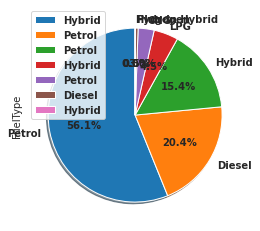

In [34]:
pie_chart = df['FuelType'].value_counts()
fuel_pie = pie_chart.plot.pie(shadow=True,startangle=90,autopct='%1.1f%%')
plt.legend(df['FuelType'])
plt.show()

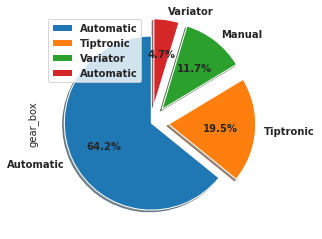

In [35]:
#gear_box
pie_chart = df['gear_box'].value_counts()
myexplode = [0,0.2,0.2,0.2]
fig1 = pie_chart.plot.pie(shadow=True,startangle=90,autopct='%1.1f%%', explode =myexplode)
plt.legend(df['gear_box'])
plt.show()

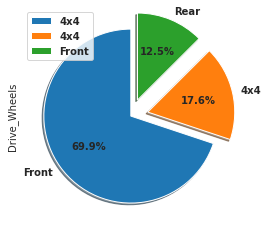

In [36]:
pie_chart = df['Drive_Wheels'].value_counts()
myexplode = [0,0.2,0.2]
fig1 = pie_chart.plot.pie(shadow=True,startangle=90,autopct='%1.1f%%', explode =myexplode)
plt.legend(df['Drive_Wheels'])
plt.show()

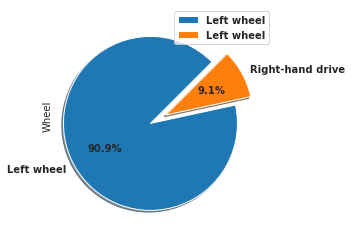

In [37]:
pie_chart = df['Wheel'].value_counts()
myexplode = [0.2,0,]
fig1 = pie_chart.plot.pie(shadow=True,startangle=45,autopct='%1.1f%%', explode =myexplode)
plt.legend(df['Wheel'])
plt.show()

Numerical Values

In [38]:
#analysis on  car production
annual_production = df.groupby(['Year']).size().reset_index().rename(columns = {0:'Counts'})
annual_production

,Year,Counts
0,1939,3
1,1943,1
2,1947,1
3,1953,4
4,1957,1
5,1964,2
6,1965,2
7,1968,1
8,1973,1
9,1974,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



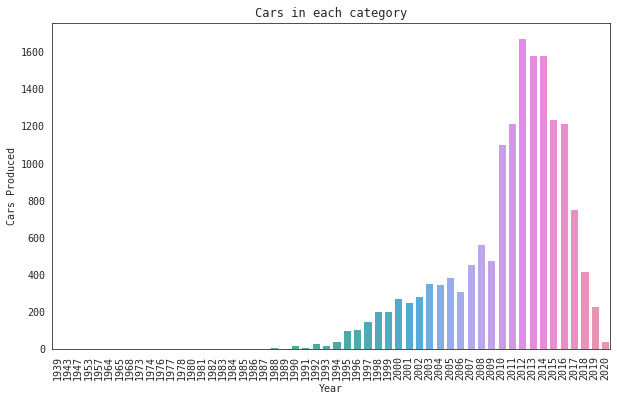

In [39]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=2)
font = {'family' : 'monospace',
        'weight' : 'normal',
        }
plt.rc('font', **font)
plt.title( 'Cars in each category')
sns.set_style("white")
production=sns.barplot('Year', 'Counts', data = annual_production);
production.set_xticklabels(annual_production['Year'] ,rotation=90)
production.set(xlabel='Year', ylabel='Cars Produced')
plt.show()

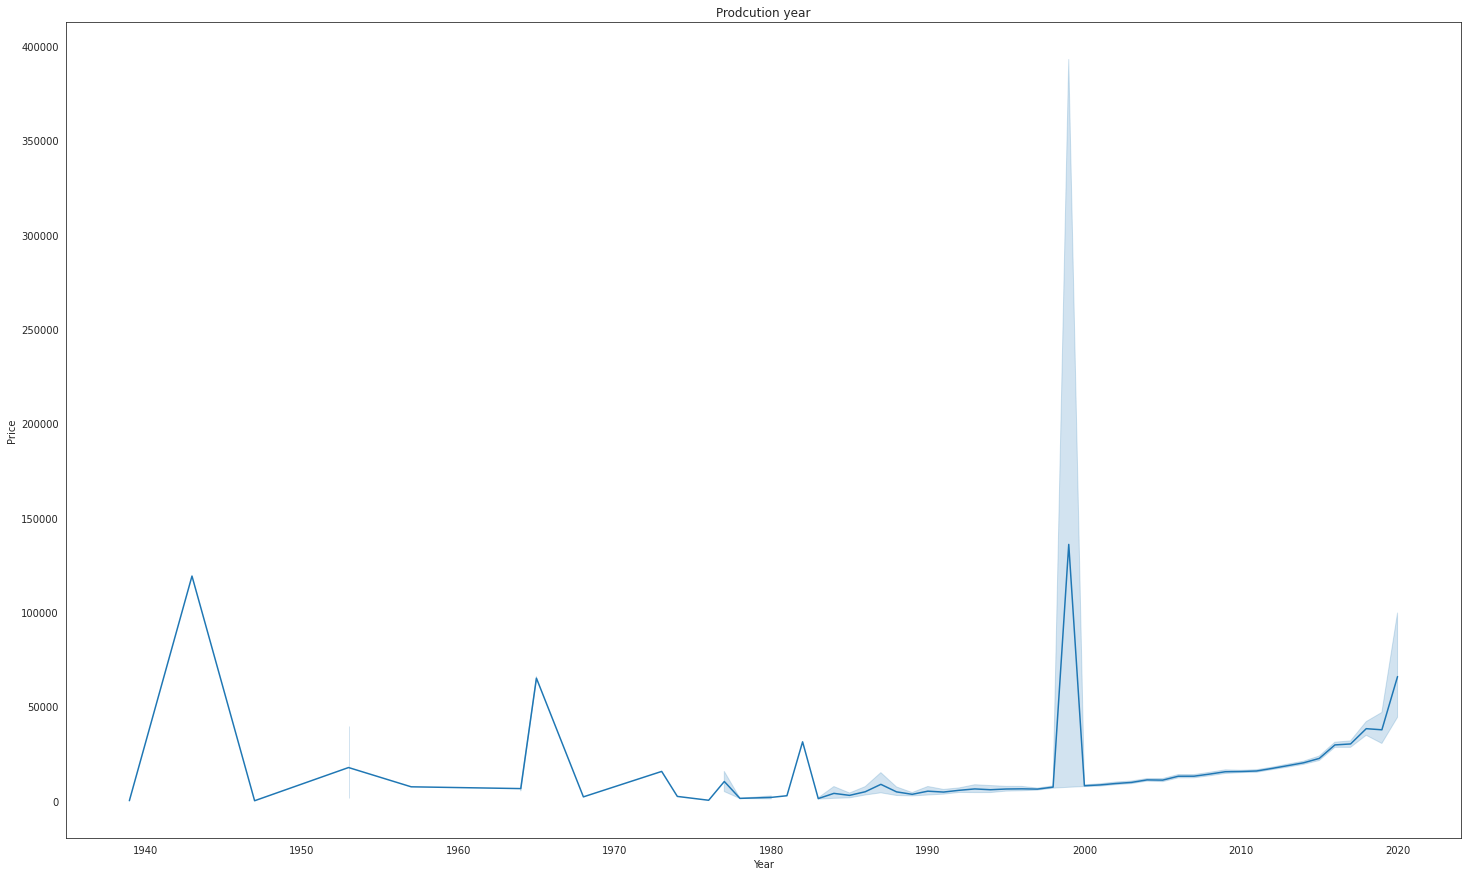

In [40]:

  plt.figure(figsize=(25,15))
  year = sns.lineplot(x = 'Year', y = 'Price', data=df)
  plt.title('Prodcution year')
  plt.show()

In [41]:
Price= df['Price'].value_counts().head(40)
Price

15681    235
14113    231
10976    228
7840     218
17249    211
12544    205
9408     190
18817    185
20385    173
10036    158
470      150
10349    148
23521    144
13172    144
11917    139
6272     139
8467     136
11604    135
7213     135
16308    129
549      122
13485    122
21953    119
15053    118
17876    118
16621    118
8781     117
392      113
8154     109
11290    105
627      105
6899     104
18189    103
25089     98
19444     97
9722      95
7527      92
12231     90
6586      88
314       87
Name: Price, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



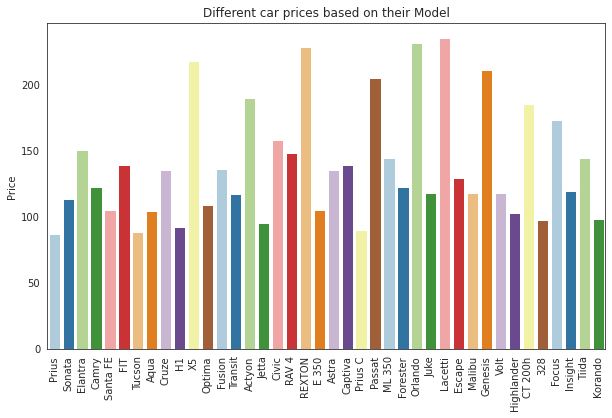

In [42]:
plt.figure(figsize=(10,6))
plt.title('Different car prices based on their Model')
a =sns.barplot(Price.index, Price, palette = 'Paired')
a.set_xticklabels(Model.index, rotation = 90)
plt.show()

In [43]:
#factor that affect the price of cars
price_factors = px.treemap(data_frame=df,path=["Manufacturer","Category","Model"],values='Price',title='car price')
price_factors.show()

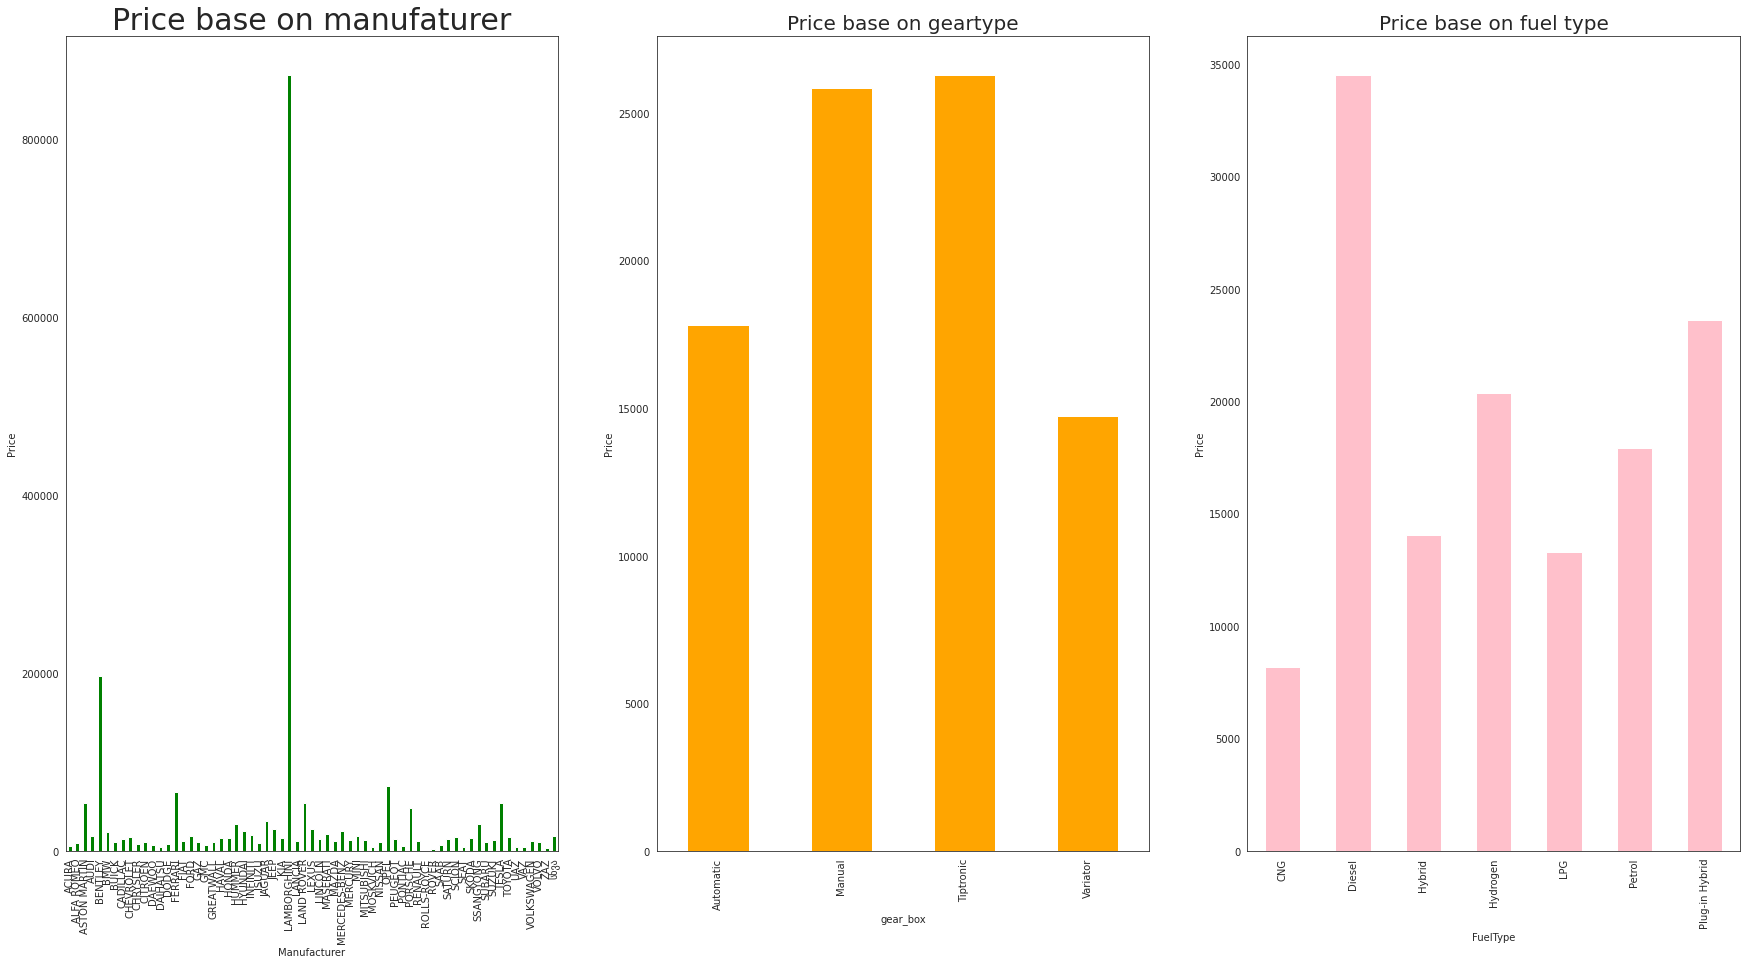

In [44]:
plt.figure(figsize=(30,15))
plt.subplot(131)
plt.title('Price base on manufaturer',fontsize = 30)
plt.ylabel("Price")
df.groupby('Manufacturer')['Price'].mean().plot.bar(color = 'green')
plt.subplot(132)
plt.title('Price base on geartype',fontsize = 20)
plt.ylabel("Price")
df.groupby('gear_box')['Price'].mean().plot.bar(color = 'orange')
plt.subplot(133)
plt.title('Price base on fuel type',fontsize = 20)
plt.ylabel("Price")
df.groupby('FuelType')['Price'].mean().plot.bar(color = 'pink')
plt.show()


Text(0, 0.5, 'Price')

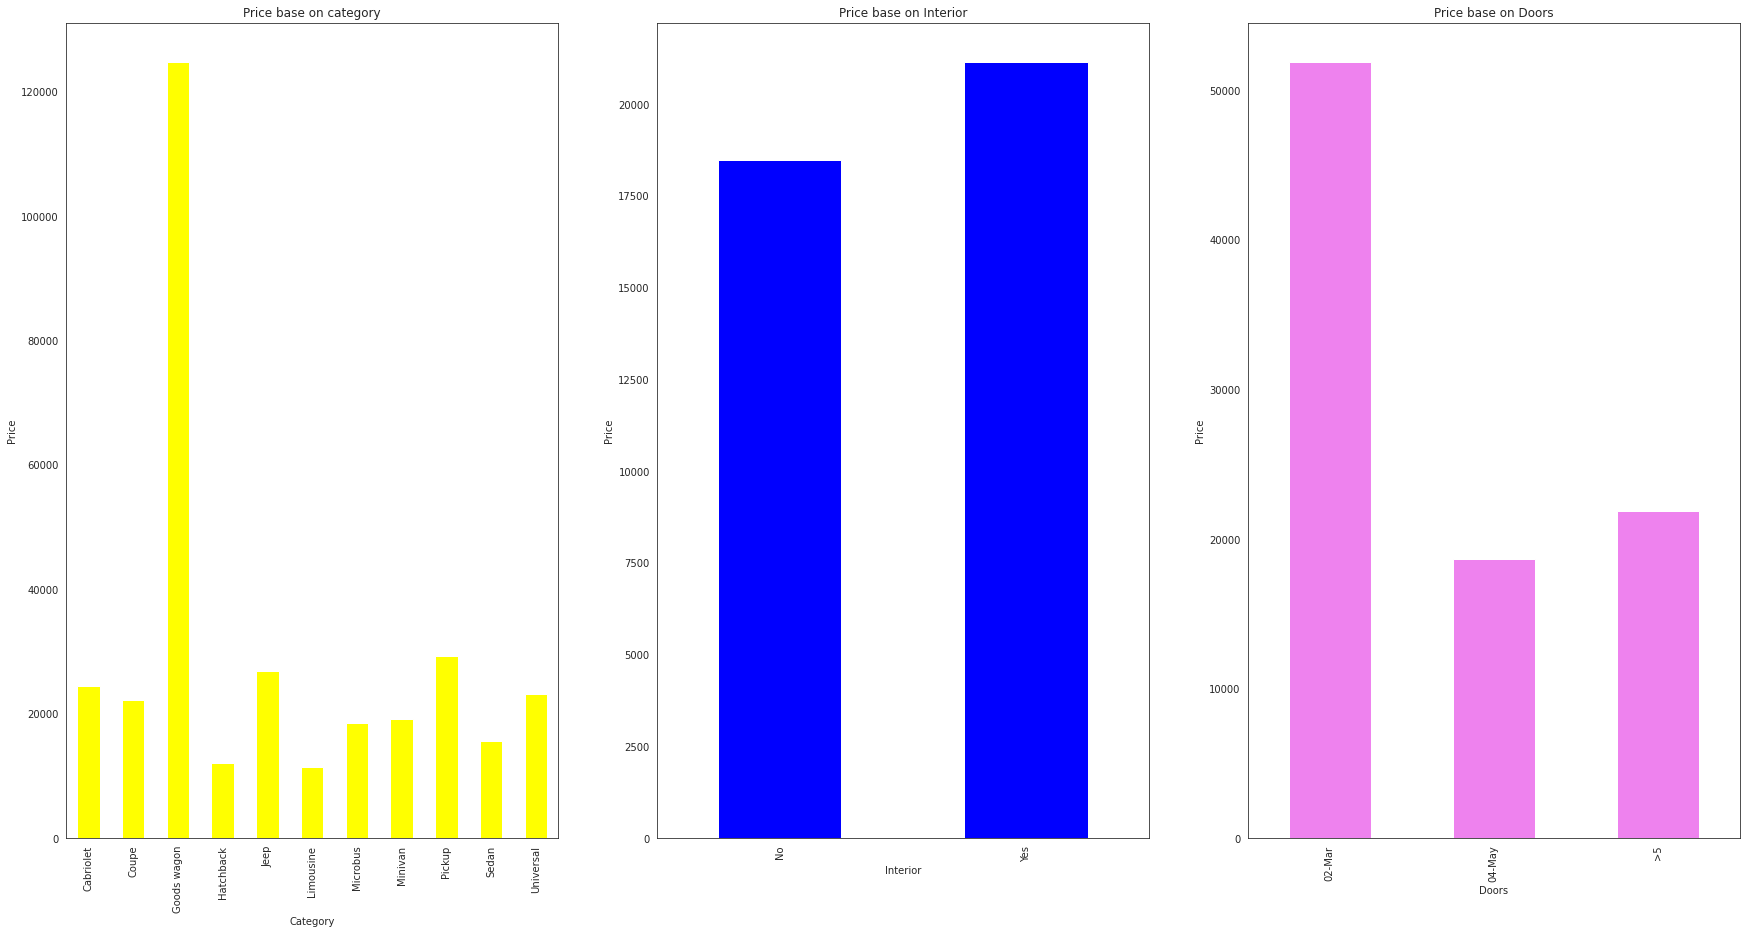

In [45]:
plt.figure(figsize=(30,15))
plt.subplot(131)
df.groupby('Category')['Price'].mean().plot.bar(color = 'yellow')
plt.title('Price base on category')
plt.ylabel('Price')
plt.subplot(132)
plt.title('Price base on Interior')
df.groupby('Interior')['Price'].mean().plot.bar(color= 'blue')
plt.ylabel('Price')
plt.subplot(133)
plt.title('Price base on Doors')
df.groupby('Doors')['Price'].mean().plot.bar(color='violet')
plt.ylabel('Price')

In [46]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Year', 'Category',
       'Interior', 'FuelType', 'Volume', 'Mileage', 'Cylinders', 'gear_box',
       'Drive_Wheels', 'Doors', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

Text(0, 0.5, 'Price')

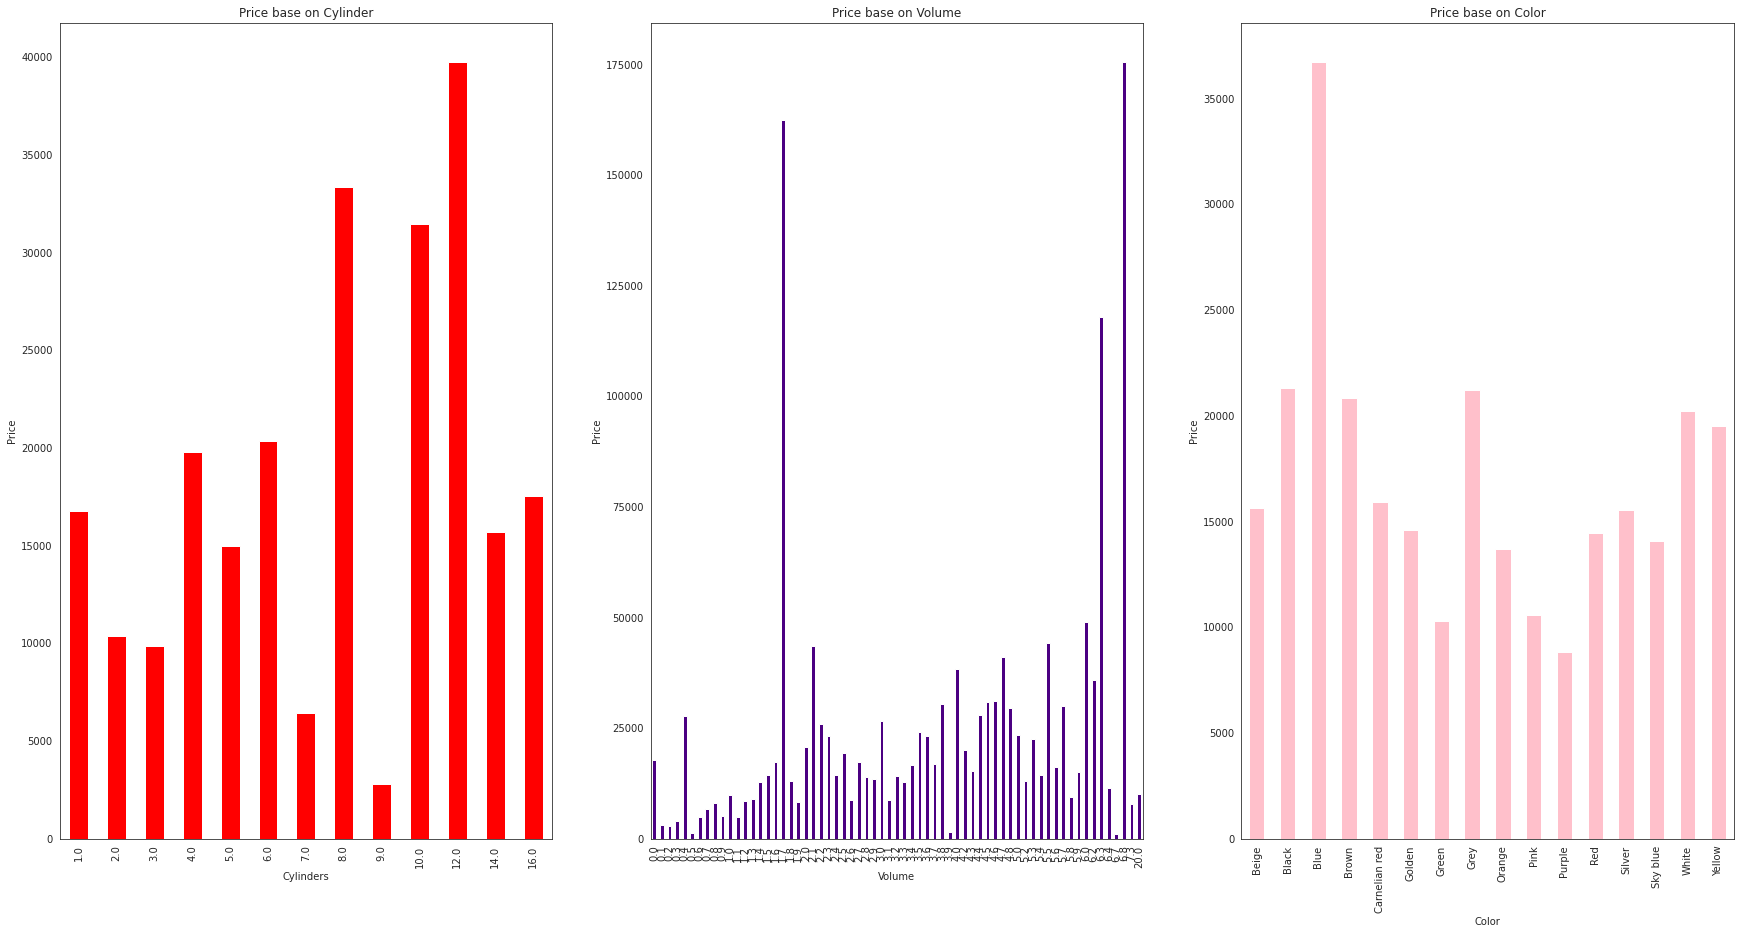

In [47]:
plt.figure(figsize=(30,15))
plt.subplot(131)
plt.title('Price base on Cylinder')
df.groupby('Cylinders')['Price'].mean().plot.bar(color='red')
plt.ylabel('Price')
plt.subplot(132)
df.groupby('Volume')['Price'].mean().plot.bar(color ='indigo')
plt.title('Price base on Volume')
plt.ylabel('Price')
plt.subplot(133)
plt.title('Price base on Color')
df.groupby('Color')['Price'].mean().plot.bar(color = 'pink')
plt.ylabel('Price')

In [48]:
most_popular = df.sort_values(by=['Price', 'Volume'],ascending = False).reset_index().loc[:9]
most_popular

,index,Price,Levy,Manufacturer,Model,Year,Category,Interior,FuelType,Volume,Mileage,Cylinders,gear_box,Drive_Wheels,Doors,Wheel,Color,Airbags
0,16983,26307500,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,02-Mar,Left wheel,Blue,0
1,8541,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
2,1225,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
3,5008,308906,1694,PORSCHE,911,2016,Coupe,Yes,Petrol,4.0,8690,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12
4,9367,297930,0,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,4.0,20000,8.0,Tiptronic,Rear,02-Mar,Left wheel,White,16
5,14839,297930,0,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,3.0,4500,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
6,7749,288521,2269,BMW,M5 Машина в максимально,2018,Sedan,Yes,Petrol,4.4,13500,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
7,10759,260296,0,LEXUS,LX 570,2018,Jeep,Yes,Petrol,5.7,17700,8.0,Tiptronic,4x4,04-May,Left wheel,Black,10
8,5840,254024,1292,MERCEDES-BENZ,GLE 400 A M G,2016,Jeep,Yes,Petrol,3.0,73000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,12
9,15283,250574,1481,MERCEDES-BENZ,GLE 400,2017,Jeep,Yes,Petrol,3.0,81600,6.0,Tiptronic,4x4,04-May,Left wheel,Black,12


In [49]:
Levy=df['Levy'].value_counts()
Levy

0       5684
891      387
765      387
639      340
640      336
        ... 
2177       1
5666       1
3156       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

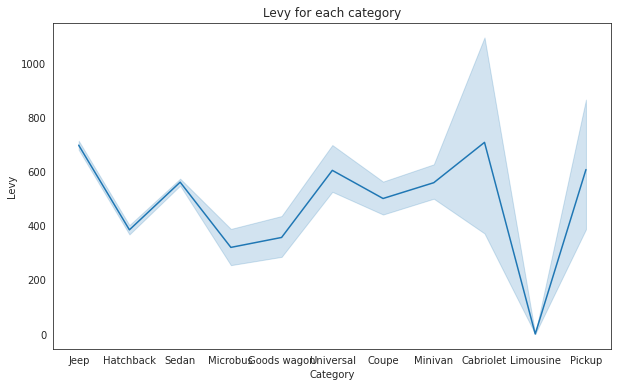

In [50]:
  plt.figure(figsize=(10,6))
  year = sns.lineplot(x = 'Category', y = 'Levy', data=df)
  plt.title('Levy for each category')
  plt.show()

  Turning categorical variables into numerical ones

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15725 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         15725 non-null  int64  
 1   Levy          15725 non-null  int64  
 2   Manufacturer  15725 non-null  object 
 3   Model         15725 non-null  object 
 4   Year          15725 non-null  int64  
 5   Category      15725 non-null  object 
 6   Interior      15725 non-null  object 
 7   FuelType      15725 non-null  object 
 8   Volume        15725 non-null  float64
 9   Mileage       15725 non-null  int64  
 10  Cylinders     15725 non-null  float64
 11  gear_box      15725 non-null  object 
 12  Drive_Wheels  15725 non-null  object 
 13  Doors         15725 non-null  object 
 14  Wheel         15725 non-null  object 
 15  Color         15725 non-null  object 
 16  Airbags       15725 non-null  int64  
dtypes: float64(2), int64(5), object(10)
memory usage: 2.7+ MB


In [52]:
def leather_class(i):
  if i =='Yes':
   return 1
  else:
    return 0

In [53]:
df['Interior']= df.Interior.apply(leather_class)
df['Interior'].value_counts()

1    10558
0     5167
Name: Interior, dtype: int64

In [54]:
df['gear_box'].value_counts()

Automatic    10088
Tiptronic     3064
Manual        1841
Variator       732
Name: gear_box, dtype: int64

In [55]:
def type_gear(gear):
  if gear == 'Automatic':
    return 0
  elif gear == 'Tiptronic':
    return 1
  elif gear =='Manual':
    return 2
  else:
    return 3
    

In [56]:
df['gear_box']=df.gear_box.apply(type_gear)
df['gear_box'].value_counts()

0    10088
1     3064
2     1841
3      732
Name: gear_box, dtype: int64

In [57]:
def wheel_type(i):
  if i == 'Left wheel':
    return 0
  else:
    return 1 

In [58]:
df['Wheel']= df['Wheel'].apply(wheel_type)
df['Wheel'].value_counts()

0    14293
1     1432
Name: Wheel, dtype: int64

In [59]:
df['Drive_Wheels'].value_counts()

Front    10990
4x4       2766
Rear      1969
Name: Drive_Wheels, dtype: int64

In [60]:
def Drive(i):
  if i == 'Front':
    return 0
  elif i == '4x4':
    return 1
  else:
    return 2

In [61]:
df['Drive_Wheels']= df['Drive_Wheels'].apply(Drive)
df['Drive_Wheels'].value_counts()

0    10990
1     2766
2     1969
Name: Drive_Wheels, dtype: int64

In [62]:
def Porta(i):
  if i == '04-May':
    return 0
  elif i == '02-Mar':
    return 1
  else:
    return 2

In [63]:
df['Doors']= df['Doors'].apply(Porta)
df['Doors'].value_counts()

0    14855
1      746
2      124
Name: Doors, dtype: int64

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
#convert columns to category
df['Manufacturer']=df['Manufacturer'].astype('category')
df['Model']=df['Model'].astype('category')
df['Category']=df['Category'].astype('category')
df['Color']=df['Color'].astype('category')
df['FuelType']=df['FuelType'].astype('category')

In [66]:
#assigning numerical values
df['Manufacturer']=df['Manufacturer'].cat.codes
df['Model']=df['Model'].cat.codes 
df['Category']=df['Category'].cat.codes 
df['Color']=df['Color'].cat.codes 
df['FuelType']=df['FuelType'].cat.codes 

In [67]:
df['FuelType']

0        2
1        5
2        5
3        2
4        5
        ..
19230    2
19232    0
19233    5
19234    1
19236    2
Name: FuelType, Length: 15725, dtype: int8

In [68]:
#Create an instance of One-hot-encoder
enc=OneHotEncoder()

In [69]:
#NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we 
#have huge  number of categorical variables

enc_data=pd.DataFrame(enc.fit_transform(df[['Manufacturer','Model', 'Category', 'Color', 'FuelType']]).toarray())
  
#Merge with main
New_data=df.join(enc_data)

print(New_data)
  

       Price  Levy  Manufacturer  Model  Year  Category  Interior  FuelType  \
0      13328  1399            32   1242  2010         4         1         2   
1      16621  1018             8    658  2011         4         0         5   
2       8467     0            21    684  2006         3         0         5   
3       3607   862            16    661  2011         4         1         2   
4      11726   446            21    684  2014         3         1         5   
...      ...   ...           ...    ...   ...       ...       ...       ...   
19230    470   645            58   1154  2011         3         1         2   
19232   8467     0            36    385  1999         1         1         0   
19233  15681   831            23   1334  2011         9         1         5   
19234  26108   836            23   1442  2010         4         1         1   
19236    470   753            23   1334  2012         9         1         2   

       Volume  Mileage  ...  1679  1680  1681  1682

we have to remove irrelevant features so that we have a better performinhg model, run faster 
feature = columns 


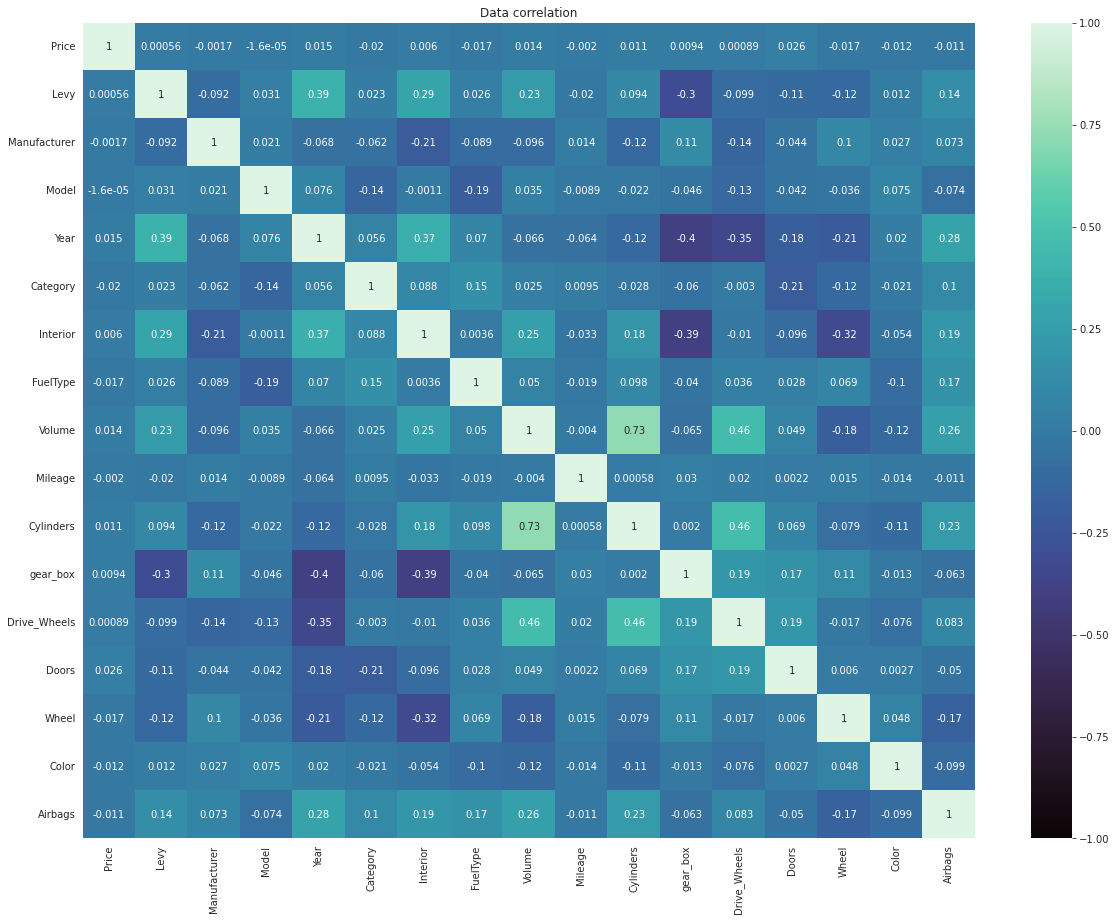

In [70]:
plt.figure(figsize=(20,15))
plt.title('Data correlation')
hm=sns.heatmap(data=df.corr(), annot=True, cmap='mako',vmin=-1)

# Model Buiding


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15725 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         15725 non-null  int64  
 1   Levy          15725 non-null  int64  
 2   Manufacturer  15725 non-null  int8   
 3   Model         15725 non-null  int16  
 4   Year          15725 non-null  int64  
 5   Category      15725 non-null  int8   
 6   Interior      15725 non-null  int64  
 7   FuelType      15725 non-null  int8   
 8   Volume        15725 non-null  float64
 9   Mileage       15725 non-null  int64  
 10  Cylinders     15725 non-null  float64
 11  gear_box      15725 non-null  int64  
 12  Drive_Wheels  15725 non-null  int64  
 13  Doors         15725 non-null  int64  
 14  Wheel         15725 non-null  int64  
 15  Color         15725 non-null  int8   
 16  Airbags       15725 non-null  int64  
dtypes: float64(2), int16(1), int64(10), int8(4)
memory usage: 2.2 MB


Selecting Features

Linear regression

In [72]:
 X1 = df.drop('Price', axis =1)
y = pd.DataFrame(df['Price'])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y,train_size=0.8, test_size=0.2, random_state=42)
from sklearn.metrics import mean_absolute_error as mae

In [74]:
from sklearn.linear_model import LinearRegression , Lasso
ln = LinearRegression()
ln.fit(X_train,y_train)
pred = ln.predict(X_test)
print('mae = ',mae(y_test,pred))

mae =  13183.447333882756


In [75]:
ls = Lasso(0.2)
ls.fit(X_train,y_train)
lasso_pred = ls.predict(X_test)
mae(y_test,lasso_pred)

13183.083024324877

In [ ]:
#random forrest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
mae(y_test,rf_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x_norm = MinMaxScaler().fit_transform(X1)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(x_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X1.loc[:,chi_support].columns.tolist()
print('selected features=',chi_feature)

In [ ]:
Xs = X1[chi_feature]
Xs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y,train_size=0.8, test_size=0.2,random_state=42)
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

Using the selected key features

In [ ]:
from sklearn.linear_model import LinearRegression , Lasso
ln = LinearRegression()
ln.fit(X_train,y_train)
pred = ln.predict(X_test)
print('mae = ',mae(y_test,pred))

In [ ]:
a#lasso
ls = Lasso(0.2)
ls.fit(X_train,y_train)
lasso_pred = ls.predict(X_test)
mae(y_test,lasso_pred)

In [ ]:
#random forrest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
mae(y_test,rf_pred)